In [2]:
import numpy  as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,r2_score

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#import keras

#import warnings
#warnings.filterwarnings('ignore')

#print(tf.reduce_sum(tf.random.normal([1000, 1000])))

In [3]:
df = pd.read_csv("../../Labs/Datetasets /Gold_Price.csv")
df.head(3)




,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [5]:
df.shape

(2583, 7)

### Data Preparation 

In [6]:
# Convert date column to datetime objects
#df['date'] = pd.to_datetime(df['Date'])
# Convert datetime objects to Unix timestamps
#df['Date'] = df['date'].apply(lambda x: datetime.datetime.timestamp(x))

#### Transforming Data 

      Date feature is stored as object inthe frame . to increase the speed , 
      we convert it's data type to datetime and sort this feature in ascending order:
   

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by='Date',ascending=True)
df=df.reset_index(drop=True )

####   The "," sing is redundant in the dataset. First , we remove it from the entrie dataset and then change the datatype of the numerycal variables to float :



In [8]:
df.drop(columns=['Vol.','Change %'],inplace=True)

In [9]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',':''},regex = True)
df[NumCols] = df[NumCols].astype('float64')


In [10]:
df.head()


,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


### Cheking missing values 
    There are no missing values in the dateset:

In [11]:
missing_values_count = df.isnull().sum()
missing_values_count

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

In [12]:
print(f'Types of variables: {df.dtypes}')

Types of variables: Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
dtype: object


In [13]:
#df[['Open', 'High', 'Low']] = df[['Open', 'High', 'Low']].astype(str).astype(int)

In [14]:
df ['Daily_mean'] = ( df['Open']+ df['Price']+ df['High']+ df['Low'])/4 
df.head(3)
df.dtypes

Date          datetime64[ns]
Price                float64
Open                 float64
High                 float64
Low                  float64
Daily_mean           float64
dtype: object

In [15]:
#plt.figure(figsize=(6,4))
#df.groupby[['Open', 'High','Low','Price']].values.plot(kind='bar')
#plt.title("Gold Close Price By Year")
#plt.ylabel("Close Price (USD $)")
#plt.show()

In [16]:
#df['Daily_mean'] = (df['Price'].values+df['Open'].values+df['High'].values+df['Low'].values)/4 #it's not a correct mean, but it's the most near one we can do
#df.head()

Text(0.5, 1.02, 'Correlation Matrix of all')

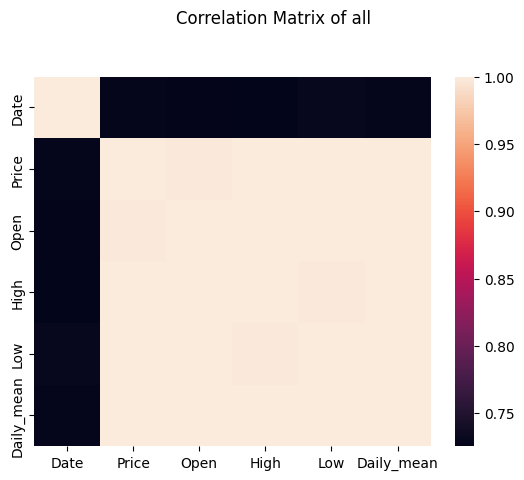

In [17]:
sns.heatmap(df.corr(), color = '#255')
plt.suptitle('Correlation Matrix of all', y=1.02)

### Visualizing Gold Price Historical Data

/Users/jack/Desktop/ML_Course/Project/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jack/Desktop/ML_Course/Project/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jack/Desktop/ML_Course/Project/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jack/Desktop/ML_Course/Project/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

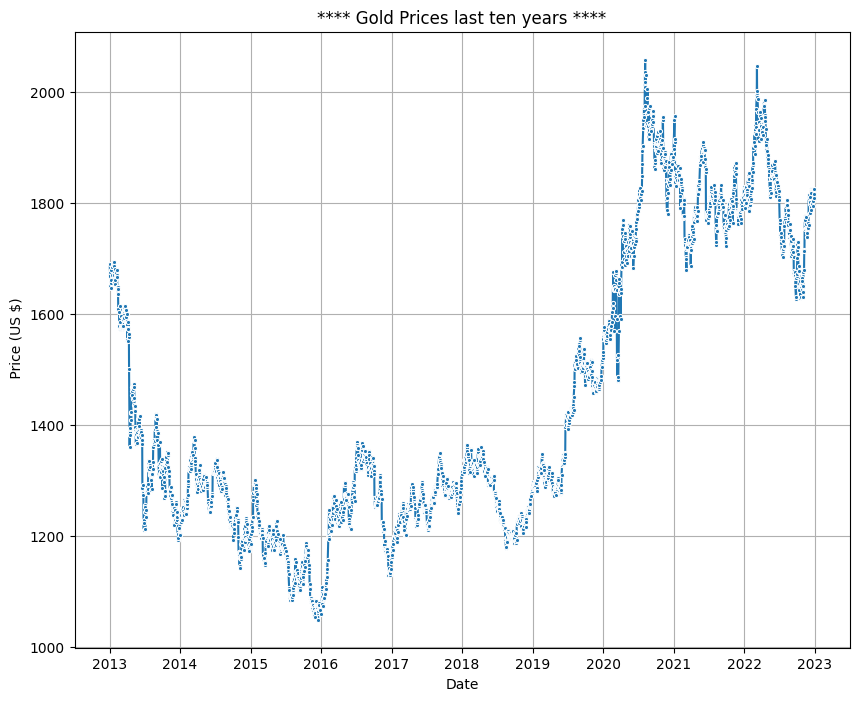

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x="Date",y="Price", marker=".")
plt.title("**** Gold Prices last ten years ****")
plt.ylabel(" Price (US $)")
plt.grid()
plt.show()



### Split data into train and test 

In [19]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Daily_mean'], dtype='object')

In [20]:
df.head(3)

,Date,Price,Open,High,Low,Daily_mean
0,2013-01-02,1689.9,1675.8,1695.0,1672.1,1683.200
1,2013-01-03,1675.6,1688.0,1689.3,1664.3,1679.300
2,2013-01-04,1649.9,1664.4,1664.4,1630.0,1652.175


In [21]:
#df=df.drop(columns=['Date','Open','Low'])
#df.head(3)

In [22]:
X = df.Daily_mean.values.reshape(-1,1)
## to see firs 3 rows 
print (X[:3,:])
y = df.Price.values
print(y)

[[1683.2  ]
 [1679.3  ]
 [1652.175]]
[1689.9 1675.6 1649.9 ... 1815.8 1826.  1826.2]


### Split data into train and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)

(1937, 1)
(1937,)


### Fit the model 


In [24]:
reg = LinearRegression().fit(X_train, y_train)

In [25]:
print(f'Slope:\n {reg.coef_}')
print(f'Interept: \n {reg.intercept_}')


Slope:
 [1.00014471]
Interept: 
 -0.28890166718201726


### Visualize data and fitted model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


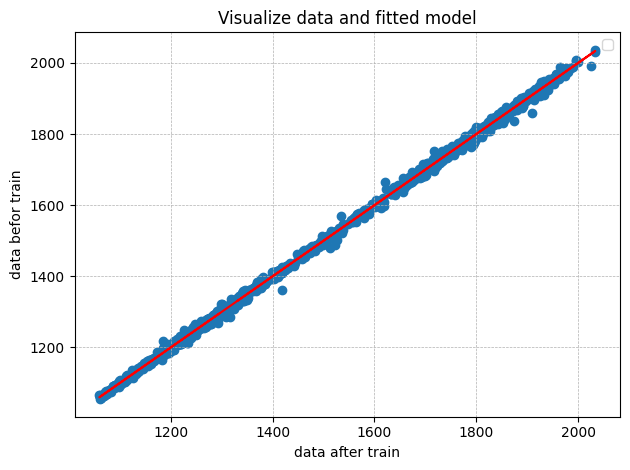

In [29]:
b = reg.intercept_
m = reg.coef_
x = X_train.reshape(-1)

fig,ax = plt.subplots()
ax.scatter(X_train.reshape(-1),y_train)
ax.plot(x, m*x+b, color="red")
plt.xlabel( 'data after train')
plt.ylabel('data befor train')
plt.title('Visualize data and fitted model')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Test the model 

In [318]:
# y = m*x+b
print( list(X_test[:3,0]))
print(list(y_test[:3]))

[1286.4, 1399.7000000000003, 1779.7999999999997]
[1294.7, 1411.8, 1780.7]


In [319]:
y = m*1297.0+b
print(y)

[1296.89878961]


### How well the model performs

In [320]:
y_pred = reg.predict(X_test).round(2)
y_pred[:4]

array([1286.3 , 1399.61, 1779.77, 1278.62])

### sravnenie !!!


In [322]:
print (y_test[:8].round(2))
print(y_pred[:8].round(2))

[1294.7 1411.8 1780.7 1275.4 1316.1 1260.4 1076.3 1817.2]
[1286.3  1399.61 1779.77 1278.62 1319.88 1249.69 1079.97 1803.12]


In [342]:
mea_by_hand = (np.absolute((y_test) - (y_pred)). sum()) / y_train.shape[0]
mea_by_hand

1.5437170882808475

In [341]:
#The mean absolut error
mae = mean_absolute_error(y_test,y_pred)
mae

4.628761609907123

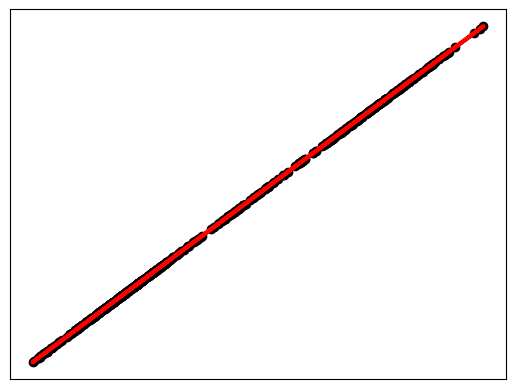

In [339]:


plt.scatter(X_test,y_pred, color="black")
plt.plot(X_test, y_pred, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# 51 1:06  https://www.kaggle.com/code/farzadnekouei/gold-price-prediction-lstm-96-accuracy